<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # Giuseppe Coccia  <br>
<b> Student 2:</b> # Paolo Moriello <br>
<b> Group name:</b> # deeplearn22
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [27]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [4]:
lr = 5.0
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
y = 0.4

x3 = sigmoid(x1*w13 + x2*w23 + x6*w63)
x4 = sigmoid(x1*w14 + x2*w24 + x6*w64)
x5 = sigmoid(x3*w35 + x4*w45 + x7*w75)

print("=== FORWARD PASS 1 ===")
print("Output =", x5)

#d_w35 = (x5-y)*dsigmoid(x3*w35 + x4*w45 + x7*w75)
#d_w45 = (x5-y)*dsigmoid(x3*w35 + x4*w45 + x7*w75)
#d_w75 = (x5-y)*dsigmoid(x3*w35 + x4*w45 + x7*w75)

#d_w13 = x1 * (d_w35 * w35 * dsigmoid(x1*w13 + x2*w23 + x6*w63))
#d_w14 = x1 * (d_w45 * w45 * dsigmoid(x1*w14 + x2*w24 + x6*w64))
#d_w23 = x2 * (d_w35 * w35 * dsigmoid(x1*w13 + x2*w23 + x6*w63))
#d_w24 = x2 * (d_w45 * w45 * dsigmoid(x1*w14 + x2*w24 + x6*w64))
#d_w63 = x6 * (d_w35 * w35 * dsigmoid(x1*w13 + x2*w23 + x6*w63))
#d_w64 = x6 * (d_w45 * w45 * dsigmoid(x1*w14 + x2*w24 + x6*w64))


dEdu31 = (x5 - y)*(x5*(1-x5))*2
dEdu21 = (dEdu31*w35)*(x3*(1-x3))
dEdu22 = (dEdu31*w45)*(x4*(1-x4))

w13 -= lr*dEdu21*x1
w23 -= lr*dEdu21*x2
w14 -= lr*dEdu22*x1
w24 -= lr*dEdu22*x2
w35 -= lr*dEdu31*x3
w45 -= lr*dEdu31*x4
w75 -= lr*dEdu31*x7
w63 -= lr*dEdu21*x6 
w64 -= lr*dEdu22*x7

#w13 -= lr*d_w13
#w14 -= lr*d_w14
#w23 -= lr*d_w23
#w24 -= lr*d_w24
#w63 -= lr*d_w63
#w64 -= lr*d_w64
#w35 -= lr*d_w35
#w45 -= lr*d_w45
#w75 -= lr*d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)

x3 = sigmoid(x1*w13 + x2*w23 + x6*w63)
x4 = sigmoid(x1*w14 + x2*w24 + x6*w64)
x5 = sigmoid(x3*w35 + x4*w45 + x7*w75) 

print("=== FORWARD PASS 2 ===")
print("Output =", x5)

=== FORWARD PASS 1 ===
Output = 0.55972959911
=== BACKWARD PASS ===
w13 = 0.343226543222
w14 = -0.527347310188
w23 = 0.810806635805
w24 = 0.193163172453
w63 = 0.254033179027
w64 = -0.434184137734
w35 = -0.854146750628
w45 = 0.274572721777
w75 = 0.106374555352
=== FORWARD PASS 2 ===
Output = 0.406488235892


<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        # set output of the first layer
        self.o_input = np.array(inputs)
        # check if bias is already into the array, if so, avoid adding it
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        
        # hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        # check if bias is already into the array, if so, avoid adding it
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
         
        # output layer
        self.u_output = self.o_hidden.dot(self.W_hidden_to_output)
        self.o_output = self.transfer_f(self.u_output)
        
        return self.o_output

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [6]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Then initialize the weights according to Figure 2
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
W_input_to_hidden = np.array([[w13, w14], [w23, w24], [w63, w64]])
W_hidden_to_output = np.array([[w35], [w45], [w75]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = np.array([[0.8, 0.2]])
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

Output = [[ 0.5597296]]


**COMMENT**<br>
The output is exactly the one expected as we have obtained the same value above.

<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [7]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        # output error
        self.dE_du_hidden = np.multiply(self.o_output - targets, self.transfer_df(self.u_output)*2)

        # hidden error
        self.dE_du_output = np.multiply(self.dE_du_hidden.dot(self.W_hidden_to_output.T), self.o_hidden*(1-self.o_hidden))
        self.dE_du_output = np.delete(self.dE_du_output, -1, axis=1)

        # Update output weights
        self.W_hidden_to_output -= learning_rate * np.dot(self.dE_du_hidden.T, self.o_hidden).T

        # Update input weights
        self.W_input_to_hidden -= learning_rate * np.dot(self.dE_du_output.T, self.o_input).T

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [8]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Re-initialize the weights according to Figure 2
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
W_input_to_hidden = np.array([[w13, w14], [w23, w24], [w63, w64]])
W_hidden_to_output = np.array([[w35], [w45], [w75]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = np.array([[0.8, 0.2]])
model.feedforward(test)

# Backpropagate
targets = np.array([[0.4]])
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[ 0.40648824]]


**COMMENT**<br>
The obtained results are the one expected

Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [9]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


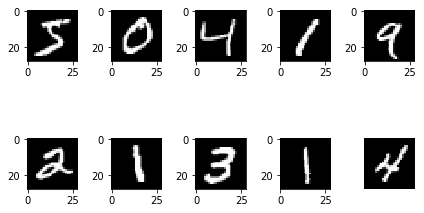

In [10]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [20]:
class NeuralNetwork(NeuralNetwork):
    def train(self, data, validation_data, iterations=50, learning_rate=5.0, verbose=False):
        import time
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        inputs  = data[0]
        targets = data[1]
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        for it in range(iterations):
            all_outputs = np.empty((len(targets), len(targets[0])))
            for i, input_data in enumerate(inputs):
                output = self.feedforward(np.array([input_data]))
                all_outputs[i] = output
                self.backpropagate(targets[i], learning_rate=learning_rate)
            error = np.array(targets) - all_outputs
            error *= error
            training_accuracies.append(100*self.predict(data)/len(data[0]))
            validation_accuracies.append(100*self.predict(validation_data)/len(validation_data[0]))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations, training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", np.sum(error)/len(targets))
        print("Training time:", time.time()-start_time)
        plot_train_val(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy")

In [12]:
# Define your neural network
mnist_model = NeuralNetwork(784, 30, 10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training time: 79.6629889011383


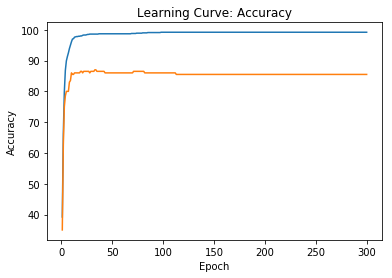

Accuracy:87.36.  Learning rate:0.10. Hidden neurons:30.
Training time: 82.55905199050903


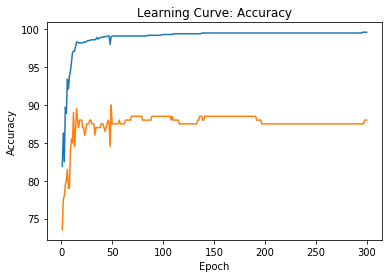

Accuracy:86.48.  Learning rate:1.00. Hidden neurons:30.
Training time: 79.62744379043579


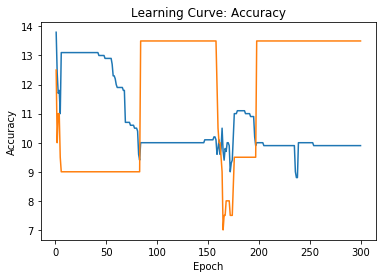

Accuracy:10.15.  Learning rate:10.00. Hidden neurons:30.


In [13]:
# Train NN and print accuracy on test data
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f.  Learning rate:%-2.2f. Hidden neurons:%d.' % (test_accuracy, lambda_, 30))
    mnist_model.weights_init()

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 61.21272134780884


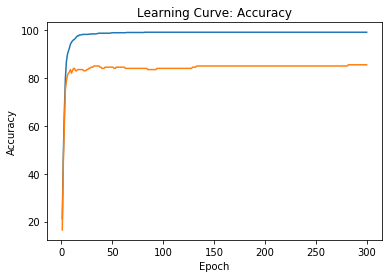

Accuracy:85.69.  Learning rate:0.10. Hidden neurons:15.
Training time: 65.70759129524231


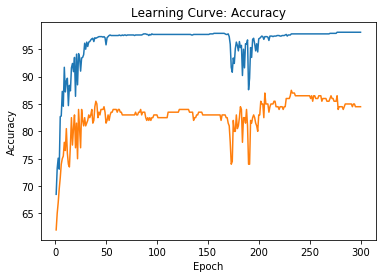

Accuracy:82.56.  Learning rate:1.00. Hidden neurons:15.
Training time: 67.58712697029114


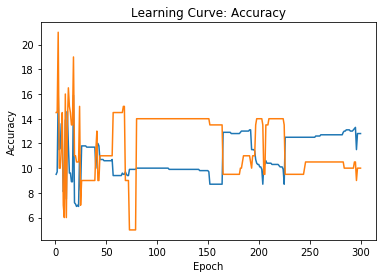

Accuracy:12.27.  Learning rate:10.00. Hidden neurons:15.
Training time: 157.5677719116211


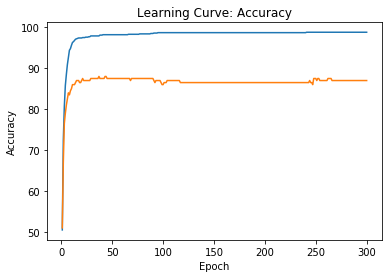

Accuracy:88.16.  Learning rate:0.10. Hidden neurons:75.
Training time: 168.6599657535553


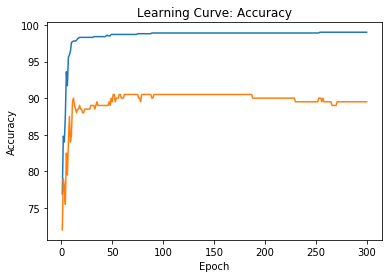

Accuracy:89.29.  Learning rate:1.00. Hidden neurons:75.
Training time: 183.65923976898193


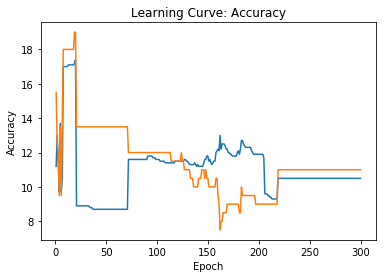

Accuracy:9.82.  Learning rate:10.00. Hidden neurons:75.


In [14]:
# Define your neural network
# 15 hidden neurons 
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 15, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f.  Learning rate:%-2.2f. Hidden neurons:%d.' % (test_accuracy, lambda_, 15))
    mnist_model.weights_init()

# 75 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 75, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f.  Learning rate:%-2.2f. Hidden neurons:%d.' % (test_accuracy, lambda_, 75))
    mnist_model.weights_init()

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 2.663844108581543


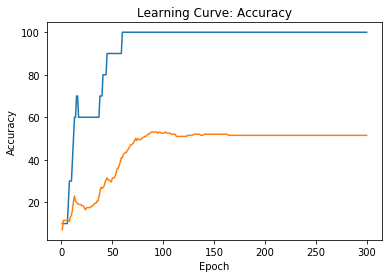

Accuracy:51.07.  Learning rate:0.10. Hidden neurons:30.
Training time: 2.786424160003662


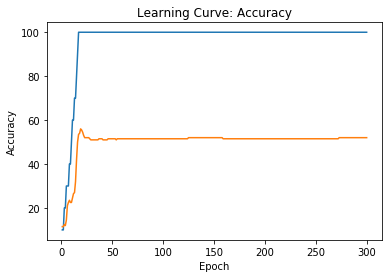

Accuracy:50.20.  Learning rate:1.00. Hidden neurons:30.
Training time: 2.595489025115967


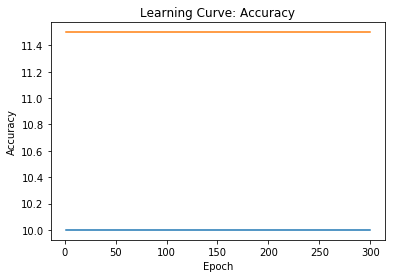

Accuracy:10.08.  Learning rate:10.00. Hidden neurons:30.
Training time: 2.181910991668701


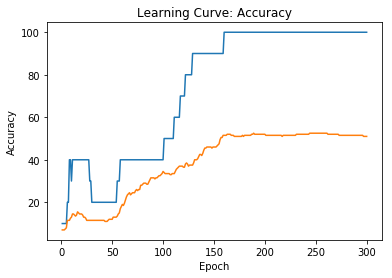

Accuracy:48.28.  Learning rate:0.10. Hidden neurons:15.
Training time: 2.2677650451660156


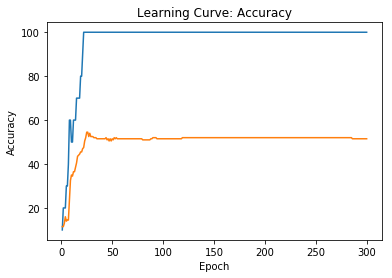

Accuracy:48.78.  Learning rate:1.00. Hidden neurons:15.
Training time: 2.4256789684295654


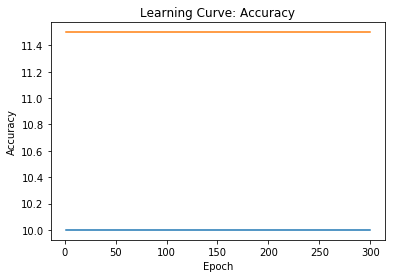

Accuracy:10.09.  Learning rate:10.00. Hidden neurons:15.
Training time: 3.3158769607543945


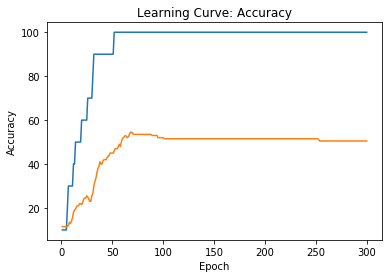

Accuracy:50.29.  Learning rate:0.10. Hidden neurons:75.
Training time: 3.304163694381714


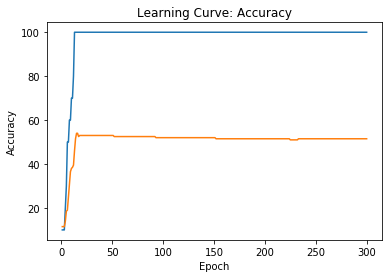

Accuracy:51.18.  Learning rate:1.00. Hidden neurons:75.
Training time: 3.1076040267944336


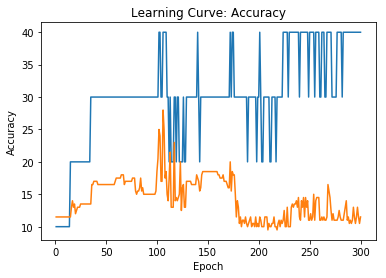

Accuracy:11.85.  Learning rate:10.00. Hidden neurons:75.


In [15]:
# Train NN and print accuracy on test data
# 30 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 30, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f.  Learning rate:%-2.2f. Hidden neurons:%d.' % (test_accuracy, lambda_, 30))
    mnist_model.weights_init()

# 15 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 15, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f.  Learning rate:%-2.2f. Hidden neurons:%d.' % (test_accuracy, lambda_, 15))
    mnist_model.weights_init()

# 75 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
mnist_model = NeuralNetwork(784, 75, 10)
for lambda_ in [0.1, 1, 10]:
    mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=lambda_)
    test_accuracy = mnist_model.predict(test_data) / 100
    print('Accuracy:%-2.2f.  Learning rate:%-2.2f. Hidden neurons:%d.' % (test_accuracy, lambda_, 75))
    mnist_model.weights_init()

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer:

From the results obtained, if we consider only the cases with the training done with the "small dataset", we can see that in general the system performs worse as the learning rate increses. In fact, the learning rate is a hyper-parameter that controls the "step-size": how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge: if the learning rate is low, then training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny; if the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.

All of that is easily noticeable in the plots above (small dataset): with lower learning rate values (0.1) the accurancy curves are softer than the cases with higher lr values (1.0); in fact, in the first plot it's possibile to see a smoother curve towards convergence than in the second case, where, in most cases, there is an evident spike towards the convergency region. Moreover, the higher the learning rate, the more the oscillations.<br>
The cases with a very high learning rate (=10.0), instead, are an evident sign of divergence. In fact, it's clear that both the accurancy curves (blue for the accurancy on the training set and orange for the accurancy on the test set) are diverging, with all those ups and downs and a "random" accurancy (often around 20%).<br>
So the best results, as expected, are those with a lower learning rate, with accurancy values always over 80%. However, the best result is the one with 75 hidden neurons, learning rate = 1.0, with an accurancy over the 89%: [Accuracy:89.29.  Learning rate:1.00. Hidden neurons:75]<br>
As expected, the best results are also obtained with more neurons; in fact, in the case of 15 neurons, the maximum accurancy got is ~86%, while, for both the 30 and 75 hidden neurons cases, considering lower learning rates only, we got always more than ~87%.

A different speech should be done for the last plots done with the very small training dataset: only 10 training samples. As expected, this is the worst in terms of accurancy and convergence; both with an high and low learning rate and whatever is the chosen architecture, the system obviously is not able to obtain the same results in terms of perfomances as with the larger training dataset. Also in this case, the best results are those obtained with lower learning rate values (0.1 or 1.0), with an accurancy around the 50% in all the cases (15, 30 or 75 hidden neurons).<br>
The main advantage of using a smaller training set is, obviously, the training time, which is way lower than the cases with bigger datasets.

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Answer:

Looking at the results obtained above, we would expect that the higher is the number of hidden neurons, the better are the performances we obtain. Generally, in fact, 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. So in this case, with an input layer of size > 700 and an output layer of size 10, 75 neurons into the hidden layer seems to be the best choice. And this is also confirmed from the results above as the average accurancy obtained with this configurations is higher than the others.<br>
Moreover, as we said above, in order to avoid the system to diverge (and obtain an high accurancy as a consequence), we should keep the learning rate low. As above we have obtained the best results with a learning rate = 1.0, we expect this to happen also with the whole dataset.

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

/Users/paolomoriello/Desktop/transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training time: 7487.7629380226135


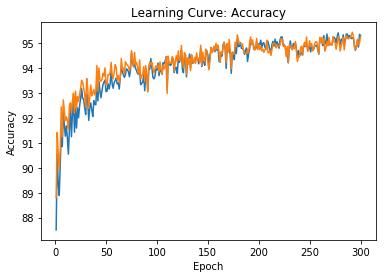

Accuracy  94.79


In [21]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train(training_data, validation_data, iterations=300, learning_rate=1.0)
test_accuracy = mnist_model.predict(test_data) / 100
print('Accuracy  %-2.2f' % test_accuracy)

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = (o_i - t_i)$

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [31]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        # set output of the first layer
        self.o_input = np.array(inputs)
        # check if bias is already into the array, if so, avoid adding it
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        
        # hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = transfer_f(self.u_hidden)
        # check if bias is already into the array, if so, avoid adding it
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
         
        # output layer
        self.u_output = self.o_hidden.dot(self.W_hidden_to_output)
        self.o_output = softmax(self.u_output)
        
        return self.o_output

    def backpropagate_xe(self, targets, learning_rate=5.0):
        # output error
        self.dE_du_hidden = self.u_output-targets

        # hidden error
        self.dE_du_output = np.multiply(self.dE_du_hidden.dot(self.W_hidden_to_output.T), self.o_hidden*(1-self.o_hidden))
        self.dE_du_output = np.delete(self.dE_du_output, -1, axis=1)

        # Update output weights
        self.W_hidden_to_output -= learning_rate * np.dot(self.dE_du_hidden.T, self.o_hidden).T

        # Update input weights
        self.W_input_to_hidden -= learning_rate * np.dot(self.dE_du_output.T, self.o_input).T

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

In [38]:
class NeuralNetwork(NeuralNetwork):
    def train_xe(self, data, validation_data, iterations=50, learning_rate=5.0, verbose=False):
        import time
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        xes = []
        inputs  = data[0]
        targets = data[1]
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        for it in range(iterations):
            all_outputs = np.empty((len(targets), len(targets[0])))
            for i, input_data in enumerate(inputs):
                self.feedforward_xe(np.array([input_data]))
                all_outputs[i] = output
                self.backpropagate_xe(targets[i], learning_rate=learning_rate)
            xe = targets*np.log(self.o_output)*(-1)
            error = np.array(targets) - all_outputs
            error *= error
            training_accuracies.append(100*self.predict(data)/len(data[0]))
            validation_accuracies.append(100*self.predict(validation_data)/len(validation_data[0]))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", np.sum(error)/len(targets))
                print("    - X-Entropy:", np.sum(xe)/len(targets))
        print("Training time:", time.time()-start_time)
        self.W_input_to_hidden = best_i2h_W
        self.W_hidden_to_output = best_h2o_W
        plot_train_val(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy")

In [39]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784, 30, 10)

# Train NN and print accuracy on validation data
mnist_model_xe.train_xe(small_training_data, small_validation_data, iterations=300, learning_rate=1.0)

AttributeError: 'NeuralNetwork' object has no attribute 'feedforward'

In [ ]:
# Print accuracy on test data
test_accuracy = mnist_model_xe.predict(test_data) / 100
print('Accuracy:%-2.2f.  Learning rate:%-2.2f. Hidden neurons:%d.' % (test_accuracy, lambda_, 30))

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

<div align="center"><b>THE END!</b>